In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS 

In [202]:
#pip install plotly==5.18.0
! pip install wordcloud


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [203]:
billboard_df=pd.read_csv('Hot 100 Audio Features.csv')
billboard_df.head(10)

,index,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
0,0,-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,¿Dònde Està Santa Claus? (Where Is Santa Claus...,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,-14.063,1.0,0.0315,0.91100,0.000267,0.112,0.150,83.969,4.0,38.0
3,3,...And Then There Were DrumsSandy Nelson,Sandy Nelson,...And Then There Were Drums,"['rock-and-roll', 'space age pop', 'surf music']",1fHHq3qHU8wpRKHzhojZ4a,NaN,172066.0,False,Compelling Percussion,...,-17.278,0.0,0.0361,0.00256,0.745000,0.145,0.801,121.962,4.0,11.0
4,4,...Baby One More TimeBritney Spears,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",3MjUtNVVq3C8Fn0MP3zhXa,https://p.scdn.co/mp3-preview/da2134a161f1cb34...,211066.0,False,...Baby One More Time (Digital Deluxe Version),...,-5.745,0.0,0.0307,0.20200,0.000131,0.443,0.907,92.960,4.0,77.0
5,5,...Ready For It?Taylor Swift,Taylor Swift,...Ready For It?,"['pop', 'post-teen pop']",2yLa0QULdQr0qAIvVwN6B5,NaN,208186.0,False,"{'album_type': 'album', 'artists': [{'external...",...,-6.509,1.0,0.1360,0.05270,0.000000,0.197,0.417,160.015,4.0,73.0
6,6,'03 Bonnie & ClydeJay-Z Featuring Beyonce Knowles,Jay-Z Featuring Beyonce Knowles,'03 Bonnie & Clyde,"['east coast hip hop', 'hip hop', 'pop rap', '...",5ljCWsDlSyJ41kwqym2ORw,NaN,205560.0,True,The Blueprint 2 The Gift & The Curse,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0
7,7,'65 Love AffairPaul Davis,Paul Davis,'65 Love Affair,"['album rock', 'bubblegum pop', 'country rock'...",5nBp8F6tekSrnFg8G2Pvug,https://p.scdn.co/mp3-preview/a701445830ecacfb...,219813.0,False,Radio Hits Of the '80s,...,-4.247,0.0,0.0274,0.43200,0.000006,0.133,0.952,155.697,4.0,40.0
8,8,"'98 Thug ParadiseTragedy, Capone, Infinite","Tragedy, Capone, Infinite",'98 Thug Paradise,['english indie rock'],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,'Round We GoBig Sister,Big Sister,'Round We Go,[],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Datasset descripion**

In [204]:
billboard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29503 entries, 0 to 29502
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      29503 non-null  int64  
 1   SongID                     29503 non-null  object 
 2   Performer                  29503 non-null  object 
 3   Song                       29503 non-null  object 
 4   spotify_genre              27903 non-null  object 
 5   spotify_track_id           24397 non-null  object 
 6   spotify_track_preview_url  14491 non-null  object 
 7   spotify_track_duration_ms  24397 non-null  float64
 8   spotify_track_explicit     24397 non-null  object 
 9   spotify_track_album        24391 non-null  object 
 10  danceability               24334 non-null  float64
 11  energy                     24334 non-null  float64
 12  key                        24334 non-null  float64
 13  loudness                   24334 non-null  flo

In [205]:
billboard_df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,29503.0,14751.000000,8516.926832,0.000000,7375.50000,14751.000000,22126.50000,29502.000
spotify_track_duration_ms,24397.0,220684.258187,67746.706860,29688.000000,175053.00000,214850.000000,253253.00000,3079157.000
danceability,24334.0,0.599945,0.153133,0.000000,0.49900,0.608000,0.70800,0.988
energy,24334.0,0.618096,0.199078,0.000581,0.47600,0.634000,0.77800,0.997
key,24334.0,5.231651,3.560211,0.000000,2.00000,5.000000,8.00000,11.000
loudness,24334.0,-8.664607,3.601119,-28.030000,-11.03400,-8.205000,-5.85625,2.291
mode,24334.0,0.727172,0.445422,0.000000,0.00000,1.000000,1.00000,1.000
speechiness,24334.0,0.073554,0.083153,0.000000,0.03210,0.041300,0.06830,0.951
acousticness,24334.0,0.294635,0.282300,0.000003,0.04670,0.195000,0.50800,0.991
instrumentalness,24334.0,0.032539,0.136276,0.000000,0.00000,0.000005,0.00046,0.982


In [206]:
billboard_df.tail(5)

,index,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
29498,29498,Zoo YorkLil Tjay Featuring Fivio Foreign & Pop...,Lil Tjay Featuring Fivio Foreign & Pop Smoke,Zoo York,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29499,29499,ZoomFuture,Future,Zoom,"['atl hip hop', 'hip hop', 'pop rap', 'rap', '...",2IG6Te7JyvrtqhFeOF7le4,https://p.scdn.co/mp3-preview/cb8fde6edc08e70a...,278429.0,True,FUTURE,...,-7.673,1.0,0.426,0.0145,0.000000,0.2630,0.627,150.945,4.0,51.0
29500,29500,ZoomLil' Boosie Featuring Yung Joc,Lil' Boosie Featuring Yung Joc,Zoom,"['baton rouge rap', 'deep southern trap']",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29501,29501,Zorba The GreekHerb Alpert & The Tijuana Brass,Herb Alpert & The Tijuana Brass,Zorba The Greek,"['adult standards', 'easy listening', 'lounge']",3WLEVNohakzZmMpN5W7mHK,https://p.scdn.co/mp3-preview/1841a4034ba42fc0...,264853.0,False,!!!Going Places!!!,...,-12.702,1.0,0.323,0.1540,0.279000,0.0584,0.192,82.107,4.0,35.0
29502,29502,Zunga ZengK7,K7,Zunga Zeng,['freestyle'],0XevPPcCBPovknaBw3lFvh,https://p.scdn.co/mp3-preview/8d5174aeb7d6b740...,273000.0,False,Swing Batta Swing!,...,-9.642,1.0,0.140,0.0478,0.000363,0.0392,0.619,103.743,4.0,28.0


# **Drop column that we are not interest/usable** 

* **spotify_track_id**

* **spotify_track_preview_url column**

In [207]:
del billboard_df['spotify_track_id']
del billboard_df['spotify_track_preview_url']
billboard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29503 entries, 0 to 29502
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      29503 non-null  int64  
 1   SongID                     29503 non-null  object 
 2   Performer                  29503 non-null  object 
 3   Song                       29503 non-null  object 
 4   spotify_genre              27903 non-null  object 
 5   spotify_track_duration_ms  24397 non-null  float64
 6   spotify_track_explicit     24397 non-null  object 
 7   spotify_track_album        24391 non-null  object 
 8   danceability               24334 non-null  float64
 9   energy                     24334 non-null  float64
 10  key                        24334 non-null  float64
 11  loudness                   24334 non-null  float64
 12  mode                       24334 non-null  float64
 13  speechiness                24334 non-null  flo

* **Dropp nan row  genere column**

In [208]:
billboard_df=billboard_df[billboard_df['spotify_genre'].notna()]

In [209]:
billboard_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27903 entries, 0 to 29502
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      27903 non-null  int64  
 1   SongID                     27903 non-null  object 
 2   Performer                  27903 non-null  object 
 3   Song                       27903 non-null  object 
 4   spotify_genre              27903 non-null  object 
 5   spotify_track_duration_ms  24249 non-null  float64
 6   spotify_track_explicit     24249 non-null  object 
 7   spotify_track_album        24243 non-null  object 
 8   danceability               24190 non-null  float64
 9   energy                     24190 non-null  float64
 10  key                        24190 non-null  float64
 11  loudness                   24190 non-null  float64
 12  mode                       24190 non-null  float64
 13  speechiness                24190 non-null  float64


* **Replace nan value in column 'spotify_track_album', with 'single',most of the track that are not in a album are single , to not unnecessarily drop to many rows** 

In [210]:
billboard_df.spotify_track_album.fillna('single',inplace=True)

In [211]:
billboard_df.spotify_track_album.head(5)

0                                            single
1                                            single
2                       The Essential Andy Williams
3                             Compelling Percussion
4    ...Baby One More Time (Digital Deluxe Version)
Name: spotify_track_album, dtype: object

* **Replace nan value in column 'spotify_track_explicit', with unknown, to not unnecessarily drop to many rows**

In [212]:
billboard_df.spotify_track_explicit.fillna('unknown',inplace=True)
billboard_df.spotify_track_explicit.head(5)

0    unknown
1    unknown
2      False
3      False
4      False
Name: spotify_track_explicit, dtype: object

# Genere attribution

In [213]:
billboard_df.spotify_genre.head()

0                                                   []
1                                          ['novelty']
2    ['adult standards', 'brill building pop', 'eas...
3     ['rock-and-roll', 'space age pop', 'surf music']
4                ['dance pop', 'pop', 'post-teen pop']
Name: spotify_genre, dtype: object

# **Attribute maingere**

In [214]:
#def return_main_genere():
lista_main_generi=['pop','metal','rock','rap','trap','jazz','blues','country','indie','house','hip hop','techno','folk','reggae','punk','disco','classical','gospel','soul','instrumental','celtic','drill','dance','r&b','sertanejo','cumbia','electronic','lo-fi','ska','doom','prog','piano','soundtrack','salsa','cumbia','orchestra','beat','psych','alt','emo','old school','romantic','funk','choral','songwriter','talent show','latin','experimental','rumba','glitch','ambient']
billboard_df['maingenere']='other'


for index,generi in billboard_df.spotify_genre.items():
    #print(index)
    prova=str(generi).replace('[',"").replace(']',"").replace("'","").replace('"',"").replace(',',"").replace('-'," ")

    counts = dict()

    # Split the input string 'str' into a list of words using spaces as separators and store it in the 'words' list.
    prova2 = prova.split( )
    #print(prova2)

    # Iterate through each word in the 'words' list.
    for word in prova2:
        # Check if the word is already in the 'counts' dictionary.
        if word in counts:
            # If the word is already in the dictionary, increment its frequency by 1.
            counts[word] += 1
        else:
            # If the word is not in the dictionary, add it to the dictionary with a frequency of 1.
            counts[word] = 1

    lista_tuple_generi = sorted(counts.items(), key = lambda x:x[1], reverse=True)       
    #print(lista_tuple_generi) # abbiamo creato un dizionario dove contiamo quante volte un genere è presente per ogni riga del df

    primo = False
    for tuple_genere in lista_tuple_generi:
        if primo == False: 
            if tuple_genere[0] in lista_main_generi:
                #print(tuple_genere[0])
                primo =True
            
                billboard_df.loc[index,'maingenere']=tuple_genere[0]
        #print(tuple_genere)
                



* **how many songs for genere**

In [215]:
billboard_df.maingenere.value_counts()

maingenere
pop             7590
rock            5156
other           4167
soul            2499
rap             2259
country         2218
disco            602
jazz             404
blues            397
funk             351
dance            347
metal            307
folk             305
house            242
indie            178
r&b              158
latin            139
trap              94
emo               89
reggae            79
instrumental      73
punk              39
romantic          30
gospel            25
classical         23
drill             19
songwriter        18
soundtrack        16
beat              12
piano             11
celtic            11
electronic        10
techno             9
ska                8
experimental       5
sertanejo          2
glitch             2
orchestra          2
ambient            2
prog               1
doom               1
salsa              1
cumbia             1
alt                1
Name: count, dtype: int64

# **Substitute nan value**

In [216]:
billboard_df.spotify_track_duration_ms.mean()

220741.0859004495

* **Substitute 'spotify_track_duration_ms' with the mean for genere**
    * **example with one genere**

In [217]:
copy_bi_df = billboard_df.copy()

In [218]:
mask_other=billboard_df.maingenere=='other'

In [219]:
other_df=billboard_df[mask_other]
other_df.head(5)

,index,SongID,Performer,Song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,maingenere
0,0,-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],NaN,unknown,single,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other
1,1,¿Dònde Està Santa Claus? (Where Is Santa Claus...,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],NaN,unknown,single,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other
9,9,'Round We GoBig Sister,Big Sister,'Round We Go,[],NaN,unknown,single,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other
11,11,'til It's Time To Say GoodbyeJonathan Cain,Jonathan Cain,'til It's Time To Say Goodbye,[],NaN,unknown,single,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other
17,17,"""B"" GirlsYoung And Restless",Young And Restless,"""B"" Girls",[],242106.0,False,Something To Get You Hyped,0.615,0.497,...,1.0,0.439,0.016,0.0,0.312,0.769,193.762,3.0,20.0,other


In [220]:
other_df.shape

(4167, 22)

In [221]:
media_other_duration=round(other_df.spotify_track_duration_ms.mean(),2)
media_other_duration

205787.48

In [222]:
other_df.spotify_track_duration_ms.fillna(media_other_duration,inplace=True)

<ipython-input-222-723b6b1d0250>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [223]:
sum(other_df.spotify_track_duration_ms.isnull())

0

* **i want to iterate for each genere**
    * **so i have to create a mask to each genere, and apply that to all the column '**

In [224]:
billboard_df.spotify_track_duration_ms.isnull().any()

True

* **we apppend 'other' in lista_main_generi**

In [225]:
lista_main_generi_other = lista_main_generi.copy()
lista_main_generi_other.append('other')
lista_main_generi_other

['pop',
 'metal',
 'rock',
 'rap',
 'trap',
 'jazz',
 'blues',
 'country',
 'indie',
 'house',
 'hip hop',
 'techno',
 'folk',
 'reggae',
 'punk',
 'disco',
 'classical',
 'gospel',
 'soul',
 'instrumental',
 'celtic',
 'drill',
 'dance',
 'r&b',
 'sertanejo',
 'cumbia',
 'electronic',
 'lo-fi',
 'ska',
 'doom',
 'prog',
 'piano',
 'soundtrack',
 'salsa',
 'cumbia',
 'orchestra',
 'beat',
 'psych',
 'alt',
 'emo',
 'old school',
 'romantic',
 'funk',
 'choral',
 'songwriter',
 'talent show',
 'latin',
 'experimental',
 'rumba',
 'glitch',
 'ambient',
 'other']

## **We substitute all 'NaN' with the mean for maingenere**

In [226]:
for null_column in billboard_df:
    if billboard_df[null_column].isnull().any() == True :
        for generi_in_l in lista_main_generi_other:
            mask_generi=billboard_df.maingenere==generi_in_l
            genere_df=billboard_df[mask_generi]

            mean_generi=round(genere_df[null_column].mean(),2)

            #billboard_df[mask_generi][null_column].fillna(mean_generi,inplace=True)

            billboard_df.loc[mask_generi, null_column] = billboard_df.loc[mask_generi, [null_column]].fillna(mean_generi)

In [227]:
billboard_df.head(10)

,index,SongID,Performer,Song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,maingenere
0,0,-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],205787.48,unknown,single,0.590,0.570,...,0.75,0.0700,0.40000,0.080000,0.200,0.630,117.760,3.89,22.16,other
1,1,¿Dònde Està Santa Claus? (Where Is Santa Claus...,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],205787.48,unknown,single,0.590,0.570,...,0.75,0.0700,0.40000,0.080000,0.200,0.630,117.760,3.89,22.16,other
2,2,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",166106.00,False,The Essential Andy Williams,0.154,0.185,...,1.00,0.0315,0.91100,0.000267,0.112,0.150,83.969,4.00,38.00,pop
3,3,...And Then There Were DrumsSandy Nelson,Sandy Nelson,...And Then There Were Drums,"['rock-and-roll', 'space age pop', 'surf music']",172066.00,False,Compelling Percussion,0.588,0.672,...,0.00,0.0361,0.00256,0.745000,0.145,0.801,121.962,4.00,11.00,rock
4,4,...Baby One More TimeBritney Spears,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",211066.00,False,...Baby One More Time (Digital Deluxe Version),0.759,0.699,...,0.00,0.0307,0.20200,0.000131,0.443,0.907,92.960,4.00,77.00,pop
5,5,...Ready For It?Taylor Swift,Taylor Swift,...Ready For It?,"['pop', 'post-teen pop']",208186.00,False,"{'album_type': 'album', 'artists': [{'external...",0.613,0.764,...,1.00,0.1360,0.05270,0.000000,0.197,0.417,160.015,4.00,73.00,pop
6,6,'03 Bonnie & ClydeJay-Z Featuring Beyonce Knowles,Jay-Z Featuring Beyonce Knowles,'03 Bonnie & Clyde,"['east coast hip hop', 'hip hop', 'pop rap', '...",205560.00,True,The Blueprint 2 The Gift & The Curse,0.730,0.650,...,0.57,0.2100,0.15000,0.010000,0.200,0.500,121.310,4.00,61.00,rap
7,7,'65 Love AffairPaul Davis,Paul Davis,'65 Love Affair,"['album rock', 'bubblegum pop', 'country rock'...",219813.00,False,Radio Hits Of the '80s,0.647,0.686,...,0.00,0.0274,0.43200,0.000006,0.133,0.952,155.697,4.00,40.00,rock
8,8,"'98 Thug ParadiseTragedy, Capone, Infinite","Tragedy, Capone, Infinite",'98 Thug Paradise,['english indie rock'],222783.59,unknown,single,0.580,0.660,...,0.70,0.0500,0.22000,0.050000,0.190,0.640,121.370,3.94,37.33,indie
9,9,'Round We GoBig Sister,Big Sister,'Round We Go,[],205787.48,unknown,single,0.590,0.570,...,0.75,0.0700,0.40000,0.080000,0.200,0.630,117.760,3.89,22.16,other


In [228]:
billboard_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27903 entries, 0 to 29502
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      27903 non-null  int64  
 1   SongID                     27903 non-null  object 
 2   Performer                  27903 non-null  object 
 3   Song                       27903 non-null  object 
 4   spotify_genre              27903 non-null  object 
 5   spotify_track_duration_ms  27901 non-null  float64
 6   spotify_track_explicit     27903 non-null  object 
 7   spotify_track_album        27903 non-null  object 
 8   danceability               27901 non-null  float64
 9   energy                     27901 non-null  float64
 10  key                        27901 non-null  float64
 11  loudness                   27901 non-null  float64
 12  mode                       27901 non-null  float64
 13  speechiness                27901 non-null  float64


* **Now we have a clean dataset,but for some genere we can't obtain the mean**
    * **we drop this value**

In [229]:
billboard_df=billboard_df.dropna()
billboard_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27901 entries, 0 to 29502
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      27901 non-null  int64  
 1   SongID                     27901 non-null  object 
 2   Performer                  27901 non-null  object 
 3   Song                       27901 non-null  object 
 4   spotify_genre              27901 non-null  object 
 5   spotify_track_duration_ms  27901 non-null  float64
 6   spotify_track_explicit     27901 non-null  object 
 7   spotify_track_album        27901 non-null  object 
 8   danceability               27901 non-null  float64
 9   energy                     27901 non-null  float64
 10  key                        27901 non-null  float64
 11  loudness                   27901 non-null  float64
 12  mode                       27901 non-null  float64
 13  speechiness                27901 non-null  float64


# **Now i have a clean dataset**

------------------------------------------------------------------------------------------------------

In [230]:
# trovare le variabili intere del dataset-> fare pair plot

###  **How many songs for genere?**

* **we want to plot it**

In [231]:
numbers_of_genere=billboard_df.maingenere.value_counts()[0:12]
numbers_of_genere

maingenere
pop        7590
rock       5156
other      4167
soul       2499
rap        2259
country    2218
disco       602
jazz        404
blues       397
funk        351
dance       347
metal       307
Name: count, dtype: int64

In [232]:
numbers_of_genere.index

Index(['pop', 'rock', 'other', 'soul', 'rap', 'country', 'disco', 'jazz',
       'blues', 'funk', 'dance', 'metal'],
      dtype='object', name='maingenere')

**I decide to rappresent only the twelve main genre, becuse the other rappresent only the 1%**

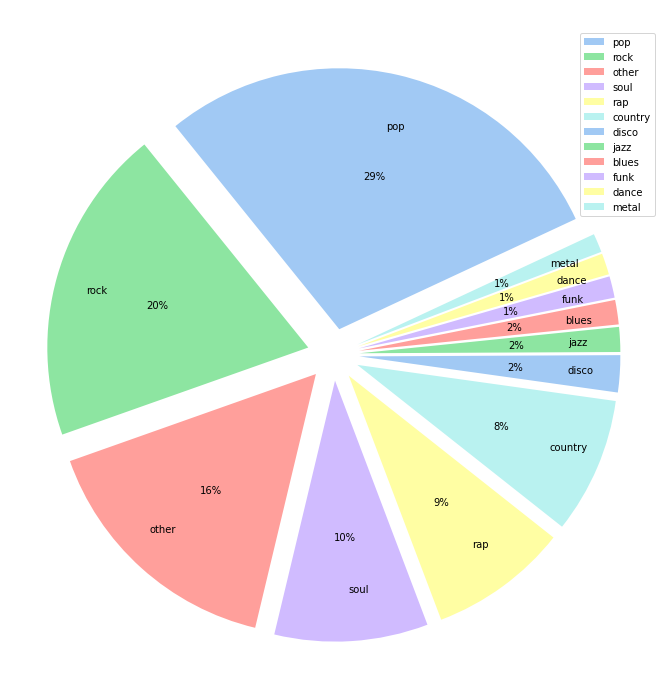

In [233]:
plt.figure(figsize=(12,12))
color=sb.color_palette('pastel6')
explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
lables=numbers_of_genere.index
plt.pie(numbers_of_genere,labels=lables, startangle=25,labeldistance=0.8,autopct='%1.0f%%',colors=color,explode=explode)
plt.title('Percentige of total genre',size=22,color='white')
plt.legend()
plt.show()

* **another interest plot coulb be:**

## **Use WordCloud**

In [234]:
#print(type(billboard_df.maingenere.value_counts()))
genere_distribution=billboard_df.maingenere.value_counts()


In [235]:
genere_distribution_no_col_maingenere=genere_distribution.to_string(header=False)

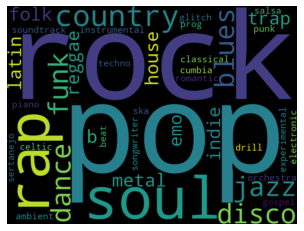

In [236]:
color=sb.color_palette('pastel6')
genere_importance = WordCloud(width=800, height=600, margin=0).generate(str(genere_distribution_no_col_maingenere))
# Display the generated image:
plt.imshow(genere_importance, interpolation='bilinear')
plt.axis("off")
#plt.title('Most popular genere',size=22)
plt.show()

# capire come togliere maingenere

# **Top 50 popular song**

In [237]:
top_50_popular_song=billboard_df.sort_values(by='spotify_track_popularity',ascending=False).head(50)
top_50_popular_song

,index,SongID,Performer,Song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,maingenere
4973,4973,Dance MonkeyTones And I,Tones And I,Dance Monkey,['australian pop'],209438.0,False,Dance Monkey (Stripped Back) / Dance Monkey,0.824,0.588,...,0.0,0.0924,0.69200,0.000104,0.1490,0.5130,98.027,4.0,100.0,pop
16613,16613,Montero (Call Me By Your Name)Lil Nas X,Lil Nas X,Montero (Call Me By Your Name),"['country rap', 'lgbtq+ hip hop', 'pop rap', '...",137875.0,True,"{'album_type': 'single', 'artists': [{'externa...",0.610,0.508,...,0.0,0.1520,0.29700,0.000000,0.3840,0.7580,178.818,4.0,100.0,country
20368,20368,RoxanneArizona Zervas,Arizona Zervas,Roxanne,['pop rap'],163636.0,True,ROXANNE,0.621,0.601,...,0.0,0.1480,0.05220,0.000000,0.4600,0.4570,116.735,5.0,99.0,pop
16256,16256,MemoriesMaroon 5,Maroon 5,Memories,"['pop', 'pop rock']",189486.0,False,Memories,0.764,0.320,...,1.0,0.0546,0.83700,0.000000,0.0822,0.5750,91.019,4.0,98.0,pop
4201,4201,CirclesPost Malone,Post Malone,Circles,"['dfw rap', 'melodic rap', 'rap']",215280.0,False,Hollywood's Bleeding,0.695,0.762,...,1.0,0.0395,0.19200,0.002440,0.0863,0.5530,120.042,4.0,98.0,rap
5986,5986,Don't Start NowDua Lipa,Dua Lipa,Don't Start Now,"['dance pop', 'pop', 'post-teen pop', 'uk pop']",183290.0,False,Don't Start Now,0.794,0.793,...,0.0,0.0842,0.01250,0.000000,0.0952,0.6770,123.941,4.0,97.0,pop
26336,26336,TusaKarol G & Nicki Minaj,Karol G & Nicki Minaj,Tusa,"['latin', 'reggaeton']",200960.0,False,Tusa,0.803,0.715,...,1.0,0.2980,0.29500,0.000134,0.0574,0.5740,101.085,4.0,97.0,latin
6819,6819,everything i wantedBillie Eilish,Billie Eilish,everything i wanted,"['electropop', 'pop']",245425.0,False,everything i wanted,0.704,0.225,...,0.0,0.0994,0.90200,0.657000,0.1060,0.2430,120.006,4.0,97.0,pop
1109,1109,All I Want For Christmas Is YouMariah Carey,Mariah Carey,All I Want For Christmas Is You,"['dance pop', 'pop', 'r&b', 'urban contemporary']",241106.0,False,Merry Christmas,0.335,0.625,...,1.0,0.0386,0.16400,0.000000,0.0708,0.3460,150.277,4.0,97.0,pop
7008,7008,FallingTrevor Daniel,Trevor Daniel,Falling,"['alternative r&b', 'melodic rap']",159381.0,False,Falling,0.784,0.430,...,0.0,0.0364,0.12300,0.000000,0.0887,0.2360,127.087,4.0,97.0,r&b


# **Most popular song for each of the 12 maingenere**

* **i have to create a df with only Performer, Song and maingenre**

In [238]:
performer_songs_genere_df=pd.DataFrame(columns=['Performer','Song','maingenere','spotify_track_popularity'])
performer_songs_genere_df['Performer']=billboard_df.Performer
performer_songs_genere_df['Song']=billboard_df.Song
performer_songs_genere_df['maingenere']=billboard_df.maingenere
performer_songs_genere_df['spotify_track_popularity']=billboard_df.spotify_track_popularity


performer_songs_genere_df.index=performer_songs_genere_df.Performer

#del performer_songs_genere_df['Performer']

performer_songs_genere_df.head(5)

,Performer,Song,maingenere,spotify_track_popularity
Performer,,,,
Bill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,other,22.16
Augie Rios,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),other,22.16
Andy Williams,Andy Williams,......And Roses And Roses,pop,38.00
Sandy Nelson,Sandy Nelson,...And Then There Were Drums,rock,11.00
Britney Spears,Britney Spears,...Baby One More Time,pop,77.00


* **Using a cycle for the 12 maingeners**

In [239]:
lista_main_generi_ridotta=['pop', 'rock', 'other', 'soul', 'rap', 'country', 'disco', 'jazz', 'blues', 'funk', 'dance', 'metal']
top_performer_song_per_populatiry_genere_df=pd.DataFrame()
for generi in lista_main_generi_ridotta:
    top_performer_song_per_populatiry_genere_series=performer_songs_genere_df[performer_songs_genere_df.maingenere==generi].sort_values(by='spotify_track_popularity',ascending=False).iloc[0]
    #print(type(top_performer_song_per_populatiry_genere))
    #top_performer_song_per_populatiry_genere_df.info()
    top_performer_song_per_populatiry_genere_df=pd.concat([top_performer_song_per_populatiry_genere_df,top_performer_song_per_populatiry_genere_series],ignore_index=True, axis = 1)
    #print(top_performer_song_per_populatiry_genere_df)

In [240]:
top_performer_song_per_populatiry_genere_df.T

,Performer,Song,maingenere,spotify_track_popularity
0,Tones And I,Dance Monkey,pop,100.0
1,Imagine Dragons,Believer,rock,89.0
2,Masked Wolf,Astronaut In The Ocean,other,96.0
3,John Legend,All Of Me,soul,87.0
4,Post Malone,Circles,rap,98.0
5,Lil Nas X,Montero (Call Me By Your Name),country,100.0
6,Bee Gees,Alive,disco,78.0
7,Etta James,At Last,jazz,75.0
8,Mungo Jerry,In The Summertime,blues,66.0
9,Eminem Featuring Rihanna,Love The Way You Lie,funk,83.0


In [241]:
billboard_df[billboard_df.Song=='Love The Way You Lie']

,index,SongID,Performer,Song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,maingenere
15556,15556,Love The Way You LieEminem Featuring Rihanna,Eminem Featuring Rihanna,Love The Way You Lie,"['detroit hip hop', 'g funk', 'hip hop', 'rap']",263373.0,True,Recovery,0.749,0.925,...,1.0,0.227,0.241,0.0,0.52,0.641,86.989,4.0,83.0,funk


## **Analize the relation between popularity and genere**

In [294]:
maingenere_gb=billboard_df.groupby('maingenere').mean(numeric_only=True)
maingenere_gb.head(5)

,index,spotify_track_duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
maingenere,,,,,,,,,,,,,,,
ambient,22082.000000,141173.000000,0.699000,0.492000,6.000000,-9.608000,1.000000,0.030500,0.082100,0.000000,0.130000,0.500500,114.961500,4.000000,0.000000
beat,16037.416667,301851.916667,0.662083,0.868500,6.250000,-8.685417,0.583333,0.075150,0.028512,0.356240,0.170767,0.520217,123.309250,4.000000,49.500000
blues,14780.944584,173611.876675,0.577146,0.553683,5.387380,-10.011668,0.830302,0.059684,0.516466,0.047127,0.233938,0.739947,119.458909,3.773224,19.879194
celtic,18212.545455,243296.376364,0.540909,0.473273,3.623636,-11.076636,0.876364,0.036945,0.557318,0.278909,0.141564,0.509909,117.996364,3.876364,36.376364
classical,12792.869565,195356.550000,0.468435,0.429217,4.500000,-12.377435,0.800000,0.038004,0.627217,0.003357,0.214239,0.498130,109.313130,3.900000,52.950000


<ipython-input-305-3d7e6e8a2d46>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-305-3d7e6e8a2d46>:3: UserWarning:

FixedFormatter should only be used together with FixedLocator



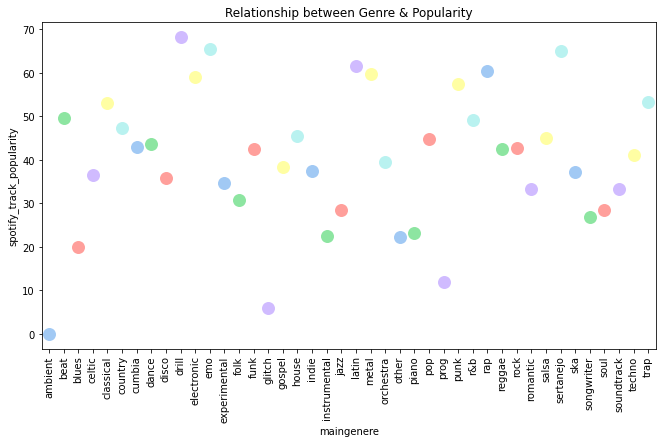

In [305]:
plt.figure(figsize=(11,6))
swarmplot=sb.swarmplot(x="maingenere",y="spotify_track_popularity",data=maingenere_gb,palette='pastel6',s=13)
swarmplot.set_xticklabels(swarmplot.get_xticklabels(),rotation=90)
swarmplot.set_title("Relationship between Genre & Popularity")
plt.show()

# capire come togliere merda sopra grafico 
# capire come mettere colori 

# **Most popular artist**

In [244]:
most_popular_performer_df=billboard_df.groupby('Performer').sum(numeric_only=True)
most_popular_performer_df.head(5)

,index,spotify_track_duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
Performer,,,,,,,,,,,,,,,
"""Groove"" Holmes",43995,585191.66,1.093,0.957,12.90,-21.418,1.76,0.0824,1.32300,1.036000,0.5020,1.104,209.185,7.81,56.38
"""Little"" Jimmy Dickens",16134,151693.00,0.660,0.801,4.00,-8.446,1.00,0.1150,0.73800,0.000010,0.6270,0.867,104.374,4.00,41.00
"""Pookie"" Hudson",11040,209523.91,0.590,0.540,5.25,-10.190,0.73,0.0500,0.42000,0.030000,0.2000,0.690,117.570,3.85,28.48
"""Weird Al"" Yankovic",156584,2212943.00,8.213,7.398,61.00,-106.717,6.00,0.8066,1.56606,0.001828,1.4357,8.538,1438.511,44.00,460.00
'N Sync,115843,1852087.32,5.310,5.130,48.33,-89.730,6.75,0.6300,3.60000,0.720000,1.8000,5.670,1059.840,35.01,199.44


In [245]:
ten_most_famous_performer_df=most_popular_performer_df.sort_values(by='spotify_track_popularity',ascending=False)[0:10]
ten_most_famous_performer_df

,index,spotify_track_duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
Performer,,,,,,,,,,,,,,,
Glee Cast,2578428,38612390.70,100.854,118.9912,1082.48,-1115.900,129.42,10.5307,50.127615,0.159376,31.6633,91.4876,22281.524,709.86,8450.40
Taylor Swift,1745655,28499351.70,70.205,71.8270,584.48,-827.816,105.42,6.4560,35.620916,0.399258,16.8201,52.3539,14622.063,472.86,7447.40
Drake,1355067,22925101.32,67.711,56.6530,535.40,-765.860,57.56,22.8828,22.417745,0.278791,20.2536,36.4868,11600.081,393.00,6524.40
The Beatles,954377,11458007.44,34.300,40.5220,273.56,-548.951,56.12,2.8200,21.179528,1.479534,12.7063,47.3710,7832.401,259.84,3738.24
Justin Bieber,599030,9893181.35,29.304,29.0370,248.24,-332.181,23.71,3.9953,14.510584,0.021802,9.1702,23.6651,5768.636,195.93,3082.70
The Weeknd,643089,10148787.00,23.752,25.6940,204.00,-295.131,15.00,3.0180,8.187030,0.169245,6.8127,13.8155,5011.201,164.00,3073.00
The Rolling Stones,836856,13552925.08,31.270,43.2560,285.42,-389.498,46.34,2.8046,15.579100,7.120793,13.3341,36.4576,6919.868,226.88,2929.43
Eminem,645656,11530598.58,31.487,31.7740,182.48,-187.288,21.58,10.0564,5.372760,0.032088,11.1807,22.1265,5010.118,167.94,2846.41
Elton John,788189,16578295.44,32.978,34.9590,226.56,-578.536,47.12,2.3282,15.878311,0.823445,10.8406,31.9908,7505.536,228.84,2745.24


* **without sort, for a better rappresentaion**

In [246]:
# provare a fare senza i valori sort

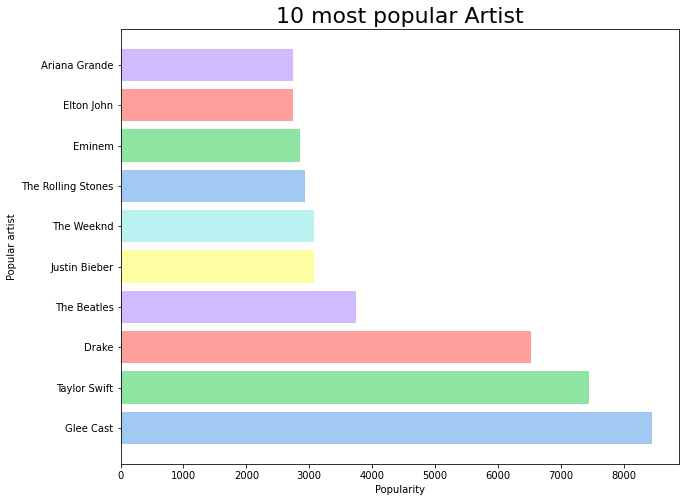

In [247]:
plt.figure(figsize=(10,8))
color=sb.color_palette('pastel6')
plt.barh(ten_most_famous_performer_df.index,ten_most_famous_performer_df.spotify_track_popularity,color=color)
plt.title('10 most popular Artist',size=22)
plt.ylabel('Popular artist')
plt.xlabel('Popularity')
plt.show()

In [248]:
# da rivedere

In [249]:
most_popular=billboard_df.sort_values(by='spotify_track_popularity',ascending=False)

In [250]:
most_popular.Performer.value_counts()[:12]

Performer
Glee Cast             183
Taylor Swift          119
Drake                  99
The Beatles            65
Aretha Franklin        64
Elton John             58
The Rolling Stones     57
The Beach Boys         54
Stevie Wonder          54
Connie Francis         53
Madonna                53
Neil Diamond           52
Name: count, dtype: int64

# **What is the percentige of 'instrumentalness' for genre**

In [251]:
instrum_genre_df=pd.DataFrame(columns=['maingenere','instrumentalness'])
instrum_genre_df['maingenere']=billboard_df.maingenere
instrum_genre_df['instrumentalness']=billboard_df.instrumentalness

instrum_genre_df.head(5)

,maingenere,instrumentalness
0,other,0.080000
1,other,0.080000
2,pop,0.000267
3,rock,0.745000
4,pop,0.000131


In [252]:
most_30_instrum_genere=instrum_genre_df.groupby('maingenere').mean(numeric_only=True).sort_values(by='instrumentalness',ascending=False)[0:30]
most_30_instrum_genere

,instrumentalness
maingenere,
soundtrack,0.659592
piano,0.490691
orchestra,0.386643
beat,0.356240
celtic,0.278909
techno,0.267916
ska,0.183994
experimental,0.182032
jazz,0.156232


* **without sort it, for a more impact rappresentation**

In [253]:
most_30_instrum_genere_notsort=instrum_genre_df.groupby('maingenere').mean(numeric_only=True)[0:30]

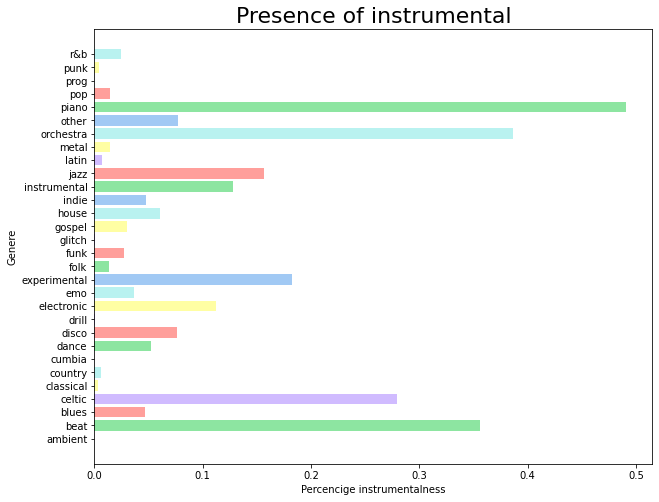

In [254]:
plt.figure(figsize=(10,8))
color=sb.color_palette('pastel6')
plt.barh(most_30_instrum_genere_notsort.index,most_30_instrum_genere_notsort.instrumentalness,color=color)
plt.ylabel('Genere')
plt.xlabel('Percencige instrumentalness')
plt.title('Presence of instrumental',size=22)
plt.show()

# **What is the percentige of 'speechiness' for genre**

In [255]:
speechiness_genre_df=pd.DataFrame(columns=['maingenere','speechiness'])
speechiness_genre_df['maingenere']=billboard_df.maingenere
speechiness_genre_df['speechiness']=billboard_df.speechiness

speechiness_genre_df.head(5)

,maingenere,speechiness
0,other,0.0700
1,other,0.0700
2,pop,0.0315
3,rock,0.0361
4,pop,0.0307


In [256]:
most_10_speechiness_genere=speechiness_genre_df.groupby('maingenere').mean(numeric_only=True).sort_values(by='speechiness',ascending=False)[0:10]
most_10_speechiness_genere

,speechiness
maingenere,
cumbia,0.412000
drill,0.259558
trap,0.219595
rap,0.208932
salsa,0.163000
emo,0.132955
reggae,0.121056
electronic,0.109690
funk,0.103012


In [257]:
print(type(most_10_speechiness_genere))

<class 'pandas.core.frame.DataFrame'>


* **how want to convert a data frame to a series**

In [258]:
ser=most_10_speechiness_genere['speechiness'].squeeze()
ser

maingenere
cumbia        0.412000
drill         0.259558
trap          0.219595
rap           0.208932
salsa         0.163000
emo           0.132955
reggae        0.121056
electronic    0.109690
funk          0.103012
latin         0.094026
Name: speechiness, dtype: float64

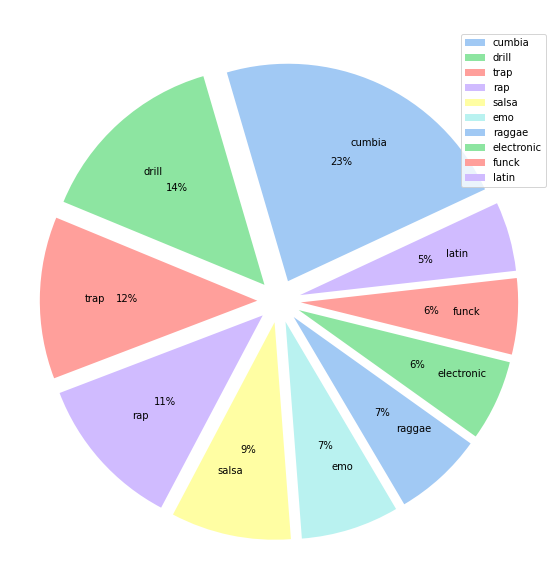

In [259]:
plt.figure(figsize=(10,10))
color=sb.color_palette('pastel6')
explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
label=['cumbia','drill','trap','rap','salsa','emo','raggae','electronic','funck','latin']
plt.pie(ser,colors=color,labels=label,explode=explode,startangle=25,labeldistance=0.7,autopct='%1.0f%%')
plt.title('Top speechiness for genere',size=22,color='white')
plt.legend()
plt.show()

# **What are the longest songs?**

In [260]:
billboard_df.head(2)

,index,SongID,Performer,Song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,maingenere
0,0,-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],205787.48,unknown,single,0.59,0.57,...,0.75,0.07,0.4,0.08,0.2,0.63,117.76,3.89,22.16,other
1,1,¿Dònde Està Santa Claus? (Where Is Santa Claus...,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],205787.48,unknown,single,0.59,0.57,...,0.75,0.07,0.4,0.08,0.2,0.63,117.76,3.89,22.16,other


* **For better compriencion i decide to convert ms in minute**

In [261]:
spotify_track_duration_ms_maingenere_df=pd.DataFrame(columns=['maingenere','Song','Performer','spotify_track_duration_minute'])
spotify_track_duration_ms_maingenere_df['maingenere']=billboard_df.maingenere
spotify_track_duration_ms_maingenere_df['Song']=billboard_df.Song
spotify_track_duration_ms_maingenere_df['Performer']=billboard_df.Performer
spotify_track_duration_ms_maingenere_df['spotify_track_duration_minute']=billboard_df.spotify_track_duration_ms/60000

spotify_track_duration_ms_maingenere_df.head(3)

,maingenere,Song,Performer,spotify_track_duration_minute
0,other,-twistin'-White Silver Sands,Bill Black's Combo,3.429791
1,other,¿Dònde Està Santa Claus? (Where Is Santa Claus?),Augie Rios,3.429791
2,pop,......And Roses And Roses,Andy Williams,2.768433


In [262]:
first_10_duration_df=spotify_track_duration_ms_maingenere_df.sort_values(by='spotify_track_duration_minute',ascending=False)[:10]
first_10_duration_df

,maingenere,Song,Performer,spotify_track_duration_minute
21033,other,Sexual,Goddess,51.319283
26259,rock,Tubular Bells,Mike Oldfield,26.018883
1826,dance,Autobahn,Kraftwerk,22.784883
3506,soul,By The Time I Get To Phoenix,Isaac Hayes,18.735883
15570,pop,Love To Love You Baby,Donna Summer,16.808883
26118,other,Trapped In The Closet,R. Kelly,16.536000
3973,jazz,Chameleon,Herbie Hancock,15.689333
10181,disco,House Of The Rising Sun,Santa Esmeralda,15.016667
26044,other,Touch Me Baby,Ultimate,14.488883
5609,rock,Do You Feel Like We Do,Peter Frampton,13.914433


* **For the rappresentation we don't want sort it, for a better rappresentation** 

In [263]:
# try to do

In [264]:
first_10_duration_notsort_df=spotify_track_duration_ms_maingenere_df[:10]

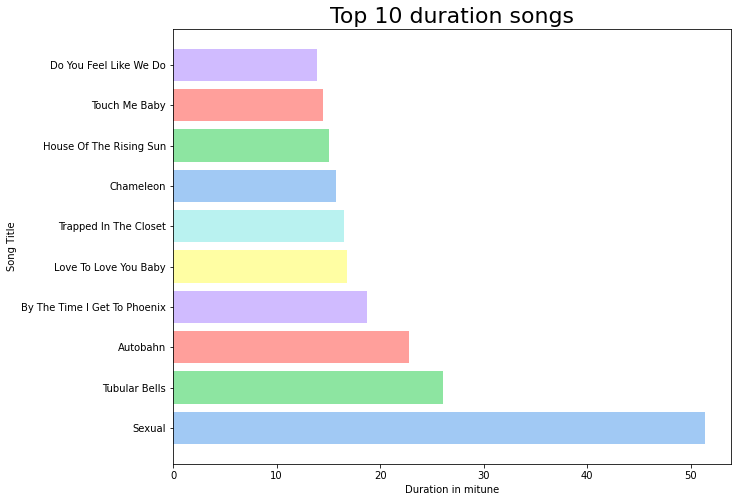

In [265]:
plt.figure(figsize=(10,8))
color=color=sb.color_palette('pastel6')
plt.barh(first_10_duration_df.Song,first_10_duration_df.spotify_track_duration_minute,color=color)
plt.title('Top 10 duration songs',size=22)
plt.xlabel('Duration in mitune')
plt.ylabel('Song Title')
plt.show()

# **Best live Performer**

In [266]:
performer_gb_df=billboard_df.groupby('Performer').sum(numeric_only=True)
performer_gb_df.head(2)

,index,spotify_track_duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
Performer,,,,,,,,,,,,,,,
"""Groove"" Holmes",43995,585191.66,1.093,0.957,12.9,-21.418,1.76,0.0824,1.323,1.03600,0.502,1.104,209.185,7.81,56.38
"""Little"" Jimmy Dickens",16134,151693.00,0.660,0.801,4.0,-8.446,1.00,0.1150,0.738,0.00001,0.627,0.867,104.374,4.00,41.00


* **i want create a df with only the variable that i'm interesteed in**    
    * **now i sort the df by liveness**

In [267]:
best_liveness_df=pd.DataFrame(columns=['Performer','liveness'])
best_liveness_df['Performer']=billboard_df.Performer
best_liveness_df['liveness']=billboard_df.liveness

best_liveness_df.head()

,Performer,liveness
0,Bill Black's Combo,0.200
1,Augie Rios,0.200
2,Andy Williams,0.112
3,Sandy Nelson,0.145
4,Britney Spears,0.443


In [268]:
best_10_live_performer=best_liveness_df.sort_values(by='liveness',ascending=False)[:10]
best_10_live_performer

,Performer,liveness
14564,The Band,0.999
6576,Cheryl Lynn,0.997
21535,Tesla,0.991
10571,Linda Ronstadt,0.990
28094,Blues Brothers,0.990
14868,Opus,0.989
15839,Ambrosia,0.989
20216,John Fogerty,0.988
20490,The Guess Who,0.988
14912,Pseudo Echo,0.987


# **Metal**

In [269]:
mask_metal=billboard_df.maingenere == 'metal'

In [270]:
metal_df=billboard_df[mask_metal]
metal_df.head(5)

,index,SongID,Performer,Song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,maingenere
81,81,(I Hate) Everything About YouThree Days Grace,Three Days Grace,(I Hate) Everything About You,"['alternative metal', 'canadian metal', 'canad...",231480.0,False,Three Days Grace (Deluxe Version),0.498,0.830,...,0.0,0.0421,0.004610,0.000000,0.1390,0.453,89.342,4.0,74.0,metal
236,236,(You Want To) Make A MemoryBon Jovi,Bon Jovi,(You Want To) Make A Memory,"['glam metal', 'rock']",276453.0,False,Lost Highway,0.496,0.440,...,1.0,0.0263,0.117000,0.000111,0.1200,0.208,147.960,4.0,54.0,metal
816,816,AddictedSaving Abel,Saving Abel,Addicted,"['alternative metal', 'nu metal', 'post-grunge']",222826.0,True,Saving Abel,0.512,0.865,...,1.0,0.0338,0.000821,0.000000,0.0982,0.529,138.017,4.0,68.0,metal
832,832,AerialsSystem Of A Down,System Of A Down,Aerials,"['alternative metal', 'nu metal', 'post-grunge...",235053.0,False,Toxicity,0.364,0.922,...,0.0,0.0566,0.000918,0.035000,0.0696,0.227,79.342,4.0,75.0,metal
1018,1018,AliveP.O.D.,P.O.D.,Alive,"['alternative metal', 'funk metal', 'nu metal'...",205026.0,False,Satellite (U.S. Version WEA Distribution),0.421,0.950,...,1.0,0.0768,0.000012,0.000214,0.3140,0.553,80.912,4.0,64.0,metal


## **Most popular metal band for song**

In [271]:
performer_metal_popularity_df= pd.DataFrame(columns=['Performer','Song','spotify_track_popularity'])
performer_metal_popularity_df['Performer']=metal_df.Performer
performer_metal_popularity_df['Song']=metal_df.Song
performer_metal_popularity_df['spotify_track_popularity']=metal_df.spotify_track_popularity

performer_metal_popularity_df.index=performer_metal_popularity_df.Performer


In [272]:
del performer_metal_popularity_df['Performer']

In [273]:
performer_metal_popularity_df

,Song,spotify_track_popularity
Performer,,
Three Days Grace,(I Hate) Everything About You,74.00
Bon Jovi,(You Want To) Make A Memory,54.00
Saving Abel,Addicted,68.00
System Of A Down,Aerials,75.00
P.O.D.,Alive,64.00
...,...,...
Grace Featuring G-Eazy,You Don't Own Me,59.77
Bon Jovi,You Give Love A Bad Name,81.00
Judas Priest,You've Got Another Thing Comin',59.77


In [274]:
performer_metal_popularity_df.max()

Song                        Zombie
spotify_track_popularity      84.0
dtype: object

In [275]:
performer_metal_popularity_df.spotify_track_popularity.mean()

59.77003257328991

In [276]:
performer_metal_popularity_df.min()

Song                        (I Hate) Everything About You
spotify_track_popularity                              0.0
dtype: object

In [277]:
mask_most_popular_metalbend= performer_metal_popularity_df.spotify_track_popularity > performer_metal_popularity_df.spotify_track_popularity.mean()

In [278]:
most_popular_metalbend_df = performer_metal_popularity_df[mask_most_popular_metalbend]
most_popular_metalbend_df.head(10)

,Song,spotify_track_popularity
Performer,,
Three Days Grace,(I Hate) Everything About You,74.0
Saving Abel,Addicted,68.0
System Of A Down,Aerials,75.0
P.O.D.,Alive,64.0
Flyleaf,All Around Me,62.0
Kid Rock,All Summer Long,73.0
Bon Jovi,Always,77.0
Saliva,Always,64.0
Three Days Grace,Animal I Have Become,73.0


* **i have to sort it**

In [279]:
sorted_most_popular_metal_df=most_popular_metalbend_df.sort_values(by='spotify_track_popularity',ascending=False)
sorted_most_popular_metal_df.head(10)

,Song,spotify_track_popularity
Performer,,
Linkin Park,In The End,84.0
Bon Jovi,Livin' On A Prayer,84.0
Linkin Park,Numb,83.0
System Of A Down,Chop Suey,82.0
Papa Roach,Last Resort,81.0
Bon Jovi,You Give Love A Bad Name,81.0
Evanescence Featuring Paul McCoy,Bring Me To Life,80.0
3 Doors Down,Kryptonite,79.0
Nickelback,How You Remind Me,79.0


In [280]:
ten_most_popular_matal_performer=sorted_most_popular_metal_df[0:10]
ten_most_popular_matal_performer

,Song,spotify_track_popularity
Performer,,
Linkin Park,In The End,84.0
Bon Jovi,Livin' On A Prayer,84.0
Linkin Park,Numb,83.0
System Of A Down,Chop Suey,82.0
Papa Roach,Last Resort,81.0
Bon Jovi,You Give Love A Bad Name,81.0
Evanescence Featuring Paul McCoy,Bring Me To Life,80.0
3 Doors Down,Kryptonite,79.0
Nickelback,How You Remind Me,79.0


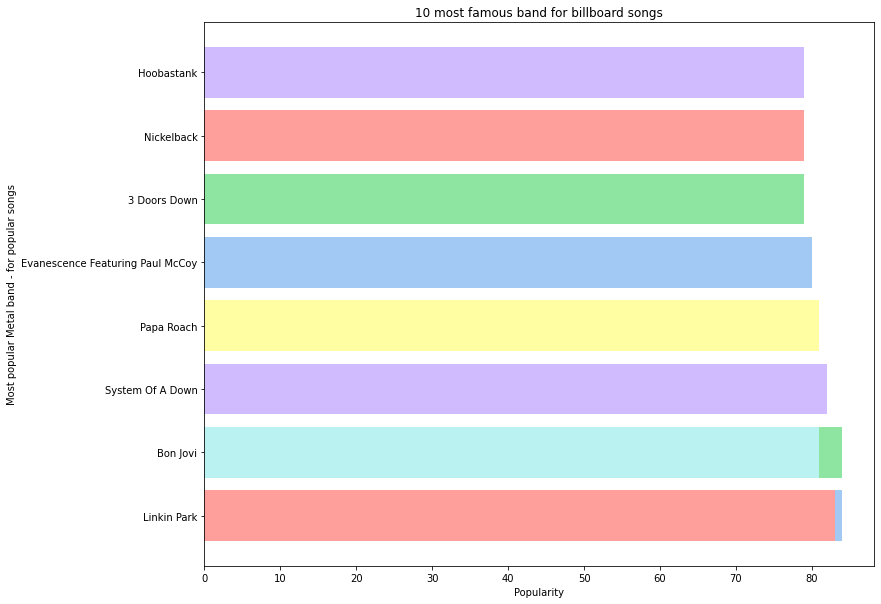

In [281]:
plt.figure(figsize=(12,10))
color=sb.color_palette('pastel6')
plt.barh(ten_most_popular_matal_performer.index,ten_most_popular_matal_performer['spotify_track_popularity'],color=color)
plt.title('10 most famous band for billboard songs')
plt.xlabel('Popularity')
plt.ylabel('Most popular Metal band - for popular songs')
plt.show()

## **What are the best live Metal band**

In [282]:
metal_df.head(2)

,index,SongID,Performer,Song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,maingenere
81,81,(I Hate) Everything About YouThree Days Grace,Three Days Grace,(I Hate) Everything About You,"['alternative metal', 'canadian metal', 'canad...",231480.0,False,Three Days Grace (Deluxe Version),0.498,0.83,...,0.0,0.0421,0.00461,0.000000,0.139,0.453,89.342,4.0,74.0,metal
236,236,(You Want To) Make A MemoryBon Jovi,Bon Jovi,(You Want To) Make A Memory,"['glam metal', 'rock']",276453.0,False,Lost Highway,0.496,0.44,...,1.0,0.0263,0.11700,0.000111,0.120,0.208,147.960,4.0,54.0,metal


In [283]:
metal_performer_gb=metal_df.groupby('Performer').sum(numeric_only=True)
metal_performer_gb.head(3)

,index,spotify_track_duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
Performer,,,,,,,,,,,,,,,
10 Years,27019,229866.0,0.391,0.801,6.00,-5.102,0.00,0.0813,0.000426,0.000208,0.0662,0.341,146.729,4.00,64.00
"10,000 Maniacs",123886,1786447.8,4.327,6.269,37.12,-43.888,4.90,1.3320,1.102200,0.060829,1.2966,4.179,931.521,31.70,358.62
3 Doors Down,130005,2485522.3,5.063,7.833,56.02,-56.031,4.65,0.3932,0.202300,0.010052,1.3523,3.517,1115.333,39.95,624.77


In [284]:
best_live_metal_df=pd.DataFrame(columns=['Performer','liveness'])
best_live_metal_df['Performer']=metal_performer_gb.index
best_live_metal_df['liveness']=metal_performer_gb.liveness.values

best_live_metal_df.head(5)

,Performer,liveness
0,10 Years,0.0662
1,"10,000 Maniacs",1.2966
2,3 Doors Down,1.3523
3,Alien Ant Farm,0.1500
4,Apocalyptica Featuring Adam Gontier,0.0799


In [285]:
top_15_live_metal_performer=best_live_metal_df.sort_values(by='liveness',ascending=False)[0:15]
top_15_live_metal_performer

,Performer,liveness
10,Bon Jovi,5.0615
53,Linkin Park,4.3654
59,Nickelback,3.4933
56,Metallica,3.1407
51,Limp Bizkit,1.8212
20,Daughtry,1.6709
62,Papa Roach,1.4620
17,Creed,1.4370
2,3 Doors Down,1.3523
1,"10,000 Maniacs",1.2966


## **Radar plot**

In [286]:
metal_performer_gb.head(3)

,index,spotify_track_duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
Performer,,,,,,,,,,,,,,,
10 Years,27019,229866.0,0.391,0.801,6.00,-5.102,0.00,0.0813,0.000426,0.000208,0.0662,0.341,146.729,4.00,64.00
"10,000 Maniacs",123886,1786447.8,4.327,6.269,37.12,-43.888,4.90,1.3320,1.102200,0.060829,1.2966,4.179,931.521,31.70,358.62
3 Doors Down,130005,2485522.3,5.063,7.833,56.02,-56.031,4.65,0.3932,0.202300,0.010052,1.3523,3.517,1115.333,39.95,624.77


In [287]:
r=[1,2,3,4]
t=['danceability','energy','loudness','instrumentalness']
fig=px.line_polar(metal_performer_gb,r,t,line_close=True)
fig.show()

## **experiment**

In [288]:
sort_bill_df=billboard_df.sort_values(by='spotify_track_popularity',ascending=False).head(30)
sort_bill_df

,index,SongID,Performer,Song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,maingenere
4973,4973,Dance MonkeyTones And I,Tones And I,Dance Monkey,['australian pop'],209438.0,False,Dance Monkey (Stripped Back) / Dance Monkey,0.824,0.588,...,0.0,0.0924,0.69200,0.000104,0.1490,0.5130,98.027,4.0,100.0,pop
16613,16613,Montero (Call Me By Your Name)Lil Nas X,Lil Nas X,Montero (Call Me By Your Name),"['country rap', 'lgbtq+ hip hop', 'pop rap', '...",137875.0,True,"{'album_type': 'single', 'artists': [{'externa...",0.610,0.508,...,0.0,0.1520,0.29700,0.000000,0.3840,0.7580,178.818,4.0,100.0,country
20368,20368,RoxanneArizona Zervas,Arizona Zervas,Roxanne,['pop rap'],163636.0,True,ROXANNE,0.621,0.601,...,0.0,0.1480,0.05220,0.000000,0.4600,0.4570,116.735,5.0,99.0,pop
16256,16256,MemoriesMaroon 5,Maroon 5,Memories,"['pop', 'pop rock']",189486.0,False,Memories,0.764,0.320,...,1.0,0.0546,0.83700,0.000000,0.0822,0.5750,91.019,4.0,98.0,pop
4201,4201,CirclesPost Malone,Post Malone,Circles,"['dfw rap', 'melodic rap', 'rap']",215280.0,False,Hollywood's Bleeding,0.695,0.762,...,1.0,0.0395,0.19200,0.002440,0.0863,0.5530,120.042,4.0,98.0,rap
5986,5986,Don't Start NowDua Lipa,Dua Lipa,Don't Start Now,"['dance pop', 'pop', 'post-teen pop', 'uk pop']",183290.0,False,Don't Start Now,0.794,0.793,...,0.0,0.0842,0.01250,0.000000,0.0952,0.6770,123.941,4.0,97.0,pop
26336,26336,TusaKarol G & Nicki Minaj,Karol G & Nicki Minaj,Tusa,"['latin', 'reggaeton']",200960.0,False,Tusa,0.803,0.715,...,1.0,0.2980,0.29500,0.000134,0.0574,0.5740,101.085,4.0,97.0,latin
6819,6819,everything i wantedBillie Eilish,Billie Eilish,everything i wanted,"['electropop', 'pop']",245425.0,False,everything i wanted,0.704,0.225,...,0.0,0.0994,0.90200,0.657000,0.1060,0.2430,120.006,4.0,97.0,pop
1109,1109,All I Want For Christmas Is YouMariah Carey,Mariah Carey,All I Want For Christmas Is You,"['dance pop', 'pop', 'r&b', 'urban contemporary']",241106.0,False,Merry Christmas,0.335,0.625,...,1.0,0.0386,0.16400,0.000000,0.0708,0.3460,150.277,4.0,97.0,pop
7008,7008,FallingTrevor Daniel,Trevor Daniel,Falling,"['alternative r&b', 'melodic rap']",159381.0,False,Falling,0.784,0.430,...,0.0,0.0364,0.12300,0.000000,0.0887,0.2360,127.087,4.0,97.0,r&b


* **A7X mask**

In [289]:
mask_a7x=billboard_df.Performer=='Avenged Sevenfold'

In [290]:
a7x_df=billboard_df[mask_a7x]
a7x_df

,index,SongID,Performer,Song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,maingenere
2288,2288,Bat CountryAvenged Sevenfold,Avenged Sevenfold,Bat Country,"['alternative metal', 'nu metal', 'post-grunge']",311813.0,False,City of Evil,0.541,0.968,...,1.0,0.0396,0.000248,0.000008,0.423,0.505,125.040,4.0,70.0,metal
8942,8942,Hail To The KingAvenged Sevenfold,Avenged Sevenfold,Hail To The King,"['alternative metal', 'nu metal', 'post-grunge']",305906.0,False,Hail to the King,0.585,0.887,...,0.0,0.0362,0.000376,0.051800,0.132,0.711,118.035,4.0,76.0,metal
17525,17525,NightmareAvenged Sevenfold,Avenged Sevenfold,Nightmare,"['alternative metal', 'nu metal', 'post-grunge']",374453.0,True,Nightmare,0.554,0.949,...,1.0,0.0787,0.000318,0.000100,0.200,0.233,129.984,4.0,73.0,metal
17809,17809,Not Ready To DieAvenged Sevenfold,Avenged Sevenfold,Not Ready To Die,"['alternative metal', 'nu metal', 'post-grunge']",425264.0,False,Not Ready to Die,0.434,0.984,...,1.0,0.1230,0.000178,0.000226,0.080,0.158,160.011,4.0,58.0,metal


In [291]:
billboard_df.columns

Index(['index', 'SongID', 'Performer', 'Song', 'spotify_genre',
       'spotify_track_duration_ms', 'spotify_track_explicit',
       'spotify_track_album', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'spotify_track_popularity',
       'maingenere'],
      dtype='object')

* **mask Tool**

In [292]:
mask_toll=billboard_df.Performer=='Tool'

In [293]:
tool_df=billboard_df[mask_toll]
tool_df

,index,SongID,Performer,Song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,maingenere
7094,7094,Fear InoculumTool,Tool,Fear Inoculum,"['alternative metal', 'alternative rock', 'art...",620101.0,False,Fear Inoculum,0.313,0.584,...,1.0,0.0415,0.000824,0.52,0.0529,0.159,87.894,4.0,71.0,metal
20810,20810,SchismTool,Tool,Schism,"['alternative metal', 'alternative rock', 'art...",403533.0,False,Lateralus,0.567,0.714,...,0.0,0.0302,0.001200,0.42,0.1860,0.191,107.438,3.0,70.0,metal
